# Monte Carlo Generator for Stock chart: 

## 1.1 Imports

In [1]:
# Imports: 

import numpy as np 
import pandas as pd 
import datetime
from matplotlib import pyplot as plt
import scipy.stats as st
import datetime
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go


## 1.2 Select files: make changes here 

In [2]:
# Get data from: https://www1.nseindia.com/products/content/equities/equities/eq_security.htm

filename = "data/DMART.csv"
stock_name = "DMART"
cleaned_file = "data/DMART-cleaned.csv"

In [3]:
# Read csv file
df = pd.read_csv(filename,parse_dates=['Date'])
df

Symbol Series       Date  Prev Close  Open Price  High Price  Low Price  \
0     DMART     EQ 2017-03-21      299.00      600.00      648.90     558.30   
1     DMART     EQ 2017-03-22      641.60      641.55      657.45     625.10   
2     DMART     EQ 2017-03-23      638.55      637.90      648.00     628.15   
3     DMART     EQ 2017-03-24      634.85      635.45      640.45     612.60   
4     DMART     EQ 2017-03-27      616.90      615.00      623.00     602.35   
...     ...    ...        ...         ...         ...         ...        ...   
1252  DMART     EQ 2022-06-27     3412.00     3460.00     3460.00    3400.00   
1253  DMART     EQ 2022-06-28     3408.60     3407.55     3497.00    3374.00   
1254  DMART     EQ 2022-06-29     3479.95     3450.45     3527.00    3425.00   
1255  DMART     EQ 2022-06-30     3445.25     3445.20     3469.00    3370.00   
1256  DMART     EQ 2022-07-01     3406.10     3394.45     3406.65    3331.10   

      Last Price  Close Price  Average Price  Total Traded Quantity  \
0         647.80       641.60         607.18               85728445   
1         636.95       638.55         644.03               15817671   
2         635.00       634.85         639.24                4690121   
3         615.25       616.90         621.12                4865013   
4         617.05       614.40         613.09                3535098   
...          ...          ...            ...                    ...   
1252     3414.00      3408.60        3429.10                 276838   
1253     3475.00      3479.95        3457.18                 440886   
1254     3433.00      3445.25        3470.27                 405633   
1255     3386.00      3406.10        3425.48                 384404   
1256     3395.00      3388.75        3372.64                 311228   

          Turnover  No. of Trades  Deliverable Qty  % Dly Qt to Traded Qty  
0     5.205259e+10         997334         25455640                   29.69  
1     1.018713e+10         230754          1980297                   12.52  
2     2.998102e+09          82509           918026                   19.57  
3     3.021774e+09          91530          1091968                   22.45  
4     2.167347e+09          63894           809694                   22.90  
...            ...            ...              ...                     ...  
1252  9.493039e+08          38287           114563                   41.38  
1253  1.524221e+09          54453           149168                   33.83  
1254  1.407658e+09          53656           156168                   38.50  
1255  1.316768e+09          48256           230903                   60.07  
1256  1.049659e+09          48482           143950                   46.25  

[1257 rows x 15 columns]

## 1.3 Pre-processing: 

In [4]:
# Calculate Ratios
df["Pct Change"]  =  df["Close Price"] / df["Prev Close"]

# Drop unused columns 
df.drop(["Series","Open Price","High Price","Low Price","Last Price","Average Price","Total Traded Quantity","Turnover", "No. of Trades","Deliverable Qty", "% Dly Qt to Traded Qty"], axis=1, inplace=True)

# Save to a cleaned csv file: 
df.to_csv(cleaned_file, index=False)

df.head()



Symbol       Date  Prev Close  Close Price  Pct Change
0  DMART 2017-03-21      299.00       641.60    2.145819
1  DMART 2017-03-22      641.60       638.55    0.995246
2  DMART 2017-03-23      638.55       634.85    0.994206
3  DMART 2017-03-24      634.85       616.90    0.971726
4  DMART 2017-03-27      616.90       614.40    0.995947

## 1.4 Some Analysis: 


In [5]:
pct_change  = df["Pct Change"].to_numpy()
df["Pct Change"].describe()

count    1257.000000
mean        1.002443
std         0.038660
min         0.889129
25%         0.990406
50%         1.000218
75%         1.011586
max         2.145819
Name: Pct Change, dtype: float64

In [6]:
print ( "Mean = ", df["Pct Change"].mean())
print ( "Std Dev = ", df["Pct Change"].std())
 

Mean =  1.002443446784435
Std Dev =  0.038660116131479356


## 1.5 Initial value of stock:

In [7]:
# Specify manually
# initial_stock_value = 3406.10

# Get last close value
initial_stock_value=df['Close Price'].iloc[-1]

print("Initial value of the stock: ", str(initial_stock_value))


Initial value of the stock:  3388.75


## 1.6 Plot histogram:
* Look for any mischeavious values (stock split, outliers, data error). All the good stocks (non-manipulated) have normal distributed because they are natural phenomenon. 
* Remove these data abnormalities

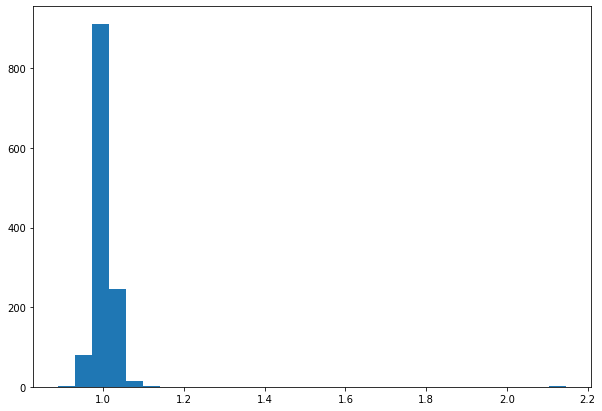

In [8]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(pct_change,bins=30)
#ax.hist(hdfcltd_ratio_a)

# Show plot
plt.show()


# 2. Simulation Functions:

In [9]:
# First determine the number of simulations to run which will be stored column wise:
num_simulations = 10000

##  2.1 Function for best fit detection for P.D.F.

In [10]:
# Yet to be done
## given a stock price df 
## calculate the best fit over the gaussian and save the model into the file
# https://stackoverflow.com/a/51742444/1176573
def get_best_distribution(data, pmf_file=""):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

## 2.2 Find Parameters of P.D.F.:

In [11]:
# # https://stackoverflow.com/questions/36256994/how-to-generate-data-from-normal-distribution
# Find Mu and Sigma for both stocks

print("Searching for best fit for stock\n")
a_p, a_q, a_r = get_best_distribution(pct_change)
print("\n\n")

# If this is normal PDf then it will have only mu and sigma
#mu, sigma = a_r[0], a_r[1]

print("PARAMS for PDF")
print(a_r)
print("\n\n")




Searching for best fit for stock

p value for norm = 5.850564530058035e-36
p value for exponweib = 7.428994744372036e-13
p value for weibull_max = 2.7397260987e-313
p value for weibull_min = 2.2831693182630594e-84
p value for pareto = 5.823063429423491e-232
p value for genextreme = 2.9832544899535087e-16
Best fitting distribution: exponweib
Best p value: 7.428994744372036e-13
Parameters for the best fit: (190.61752128699578, 1.3671350906014434, 0.825887162831838, 0.04937674924058919)



PARAMS for PDF
(190.61752128699578, 1.3671350906014434, 0.825887162831838, 0.04937674924058919)





C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning:

invalid value encountered in double_scalars



##  2.3 Monte carlo generator function: 

In [12]:
## Helper function: copied from: https://stackoverflow.com/a/12691993/1176573

import datetime

def date_by_adding_business_days(from_date, add_days):
    import datetime
    business_days_to_add = add_days
    current_date = from_date
    while business_days_to_add > 0:
        current_date += datetime.timedelta(days=1)
        weekday = current_date.weekday()
        if weekday >= 5: # sunday = 6
            continue
        business_days_to_add -= 1
    return current_date

## Monte Carlo function:

def monte_carlo_generator(mu, sigma, r_min, r_max, n_days, start_date, m_sims, initial_value, gen_reports=False, report_prefix=""):
    result_df = pd.DataFrame()
    result_ratio_df = pd.DataFrame()
    
    
    ## Logic to populate next n_days starting from start_date
    ## WARNING: It is assumed that the start_date passed to this function is NOT a WEEKEND
    ##  Later we can sanitize this behaviour 
    _temp_dates = []
    for i in range(n_days):
        _next_biz_day = date_by_adding_business_days(start_date,i)
        _temp_dates.append(str(_next_biz_day))  # Performance issue: https://stackoverflow.com/questions/68292862/performancewarning-dataframe-is-highly-fragmented-this-is-usually-the-result-o
        #_temp_dates.concat(str(_next_biz_day))
        
    result_ratio_df["Date"] = _temp_dates
    result_df["Date"] = _temp_dates
    
    ## Logic to generate ratios dataframe
    sim_column_names = []  ## This will be used for calculation on dataframe 
    for i in range(m_sims):
        _temp_ratios = np.random.normal(mu, sigma, n_days)
        # Patch:
        _temp_ratios[0] = 1.0  # This will ensure that the first row will always equal to initial value
        column_name = "sim-"+str(i)
        sim_column_names.append(column_name) # Performance issue: https://stackoverflow.com/questions/68292862/performancewarning-dataframe-is-highly-fragmented-this-is-usually-the-result-o
        #sim_column_names.concat(column_name)
        result_ratio_df[column_name] = _temp_ratios.tolist()

        
    ## Logic to compute result_df:
    ## 
    for column in sim_column_names:
        sim_i = result_ratio_df[column].to_numpy()
        temp = inefficient_way(sim_i,initial_value)
        result_df[column] = temp
    
    
    if(gen_reports):
        #print("Write the ratios dataframe to a csv file")
        report_filename1 = "output/"+report_prefix+"_ratios_"+str(datetime.datetime.now()).replace(" ","-").replace(":","-").replace(".","-") + ".csv"
        report_filename2 = "output/"+report_prefix+"_prices_"+str(datetime.datetime.now()).replace(" ","-").replace(":","-").replace(".","-") + ".csv"
        result_ratio_df.to_csv(report_filename1)    
        result_df.to_csv(report_filename2)    
        #print(sim_column_names)
    
    return result_df


def inefficient_way(single_sim_column,initial_value):
    single_col_result = np.array(single_sim_column)
    for i in range(len(single_sim_column)):
        if(i==0):
            single_col_result[0] = single_sim_column[0] * initial_value
        else:
            single_col_result[i] = single_col_result[i] * single_col_result[i-1]
    return single_col_result 

# 3. Running simulations: 

## 3.1 Run simulations: 

In [13]:
# RUN THIS CELL MY TIMES AS YOU LIKE. EACH RUN RANDOMIZES THE SIMULATION. (PSUEDO RANDOM) 

################# STOCK ###########################

#mu = a_r[0]
#sigma = a_r[1]
mu = df["Pct Change"].mean()
sigma = df["Pct Change"].std()

r_min = 0 # Not used
r_max = 0 # Not used

# Set number of Trading Days. Usually an year consists of 248 Trading days.  
#n_days = n_days
n_days = 248

#start_date = datetime.datetime.strptime("2022-04-04", "%Y-%m-%d").date()
# Get last date in DF
start_date = df['Date'].iloc[-1].strftime('%Y-%m-%d')
start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d").date()
m_sims = 100
initial_value = initial_stock_value

# Set this to True for generating the Simulation dataframe csv else False
#gen_reports=True
gen_reports=False
report_prefix = stock_name.lower()

stock_mc_df = monte_carlo_generator(mu, sigma, r_min, r_max, n_days, start_date, m_sims, initial_value, gen_reports, report_prefix)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



## 3.2 Plot charts: 

In [20]:

# Warning: Large Data
fig_stock = px.line(data_frame = stock_mc_df, x='Date', y=stock_mc_df.filter(like='sim-').columns,  title=stock_name)

# Only 8 series
# fig_stock = px.line(data_frame = stock_mc_df, x='Date', y=['sim-0', 'sim-1', 'sim-2', 'sim-3', 'sim-4', 'sim-5', 'sim-6', 'sim-7'])
fig_stock.show()

 

C:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [21]:
fig_stock.add_trace(go.Scatter(x=df["Date"], y=df["Close Price"], mode='lines'))
fig_stock.show()

## You might see broken or sudden fall in stock its due to stock split etc.


## 3.3 Prediction: 
* Compute the average of the last row.

In [16]:
# Drop all simulation values
stock_mc_df_temp = stock_mc_df.drop(stock_mc_df.filter(like='sim-').columns, axis=1)
stock_mc_df_temp

Date
0    2022-07-01
1    2022-07-04
2    2022-07-05
3    2022-07-06
4    2022-07-07
..          ...
243  2023-06-07
244  2023-06-08
245  2023-06-09
246  2023-06-12
247  2023-06-13

[248 rows x 1 columns]

In [17]:
# Calculate Median
median_yhat = stock_mc_df.median(axis=1, numeric_only=True)
mean_yhat = stock_mc_df.mean(axis=1, numeric_only=True)

# Add it to temp dataframe
stock_mc_df_temp['median_yhat'] = median_yhat
stock_mc_df_temp['mean_yhat'] = mean_yhat

stock_mc_df_temp


Date  median_yhat    mean_yhat
0    2022-07-01  3388.750000  3388.750000
1    2022-07-04  3372.097999  3386.465469
2    2022-07-05  3394.434018  3404.620749
3    2022-07-06  3407.307092  3403.600597
4    2022-07-07  3399.819603  3399.840001
..          ...          ...          ...
243  2023-06-07  5282.232298  6430.023875
244  2023-06-08  5246.865220  6441.176249
245  2023-06-09  5332.012969  6430.419684
246  2023-06-12  5255.753637  6464.353856
247  2023-06-13  5230.996871  6492.265066

[248 rows x 3 columns]

In [18]:
# Plot median predicted chart
fig_2 = px.line(data_frame = stock_mc_df_temp, x='Date', y=stock_mc_df_temp['median_yhat'])
fig_2.add_trace(go.Scatter(x=stock_mc_df_temp["Date"], y=stock_mc_df_temp["mean_yhat"], mode='lines', name="mean yhat"))
fig_2.add_trace(go.Scatter(x=df["Date"], y=df["Close Price"], mode='lines',name='stockname'))

fig_2.show()
